# Base de dados Dementia

In [ ]:
# Main libraries
import numpy as np
import pandas as pd

# Upload data library
from google.colab import drive

In [ ]:
# Connect to Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Carga inicial e identificação da estrutura do dataset e de valores nulos

In [ ]:
dementia = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/dementia_dataset.csv")

In [ ]:
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
dementia.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


# Ajuste de campos de object para int64 ou float64 e deleção de linhas com NaN

In [ ]:
dementia['M/F'].describe()

count     373
unique      2
top         F
freq      213
Name: M/F, dtype: object

In [ ]:
dementia['Hand'].describe()

count     373
unique      1
top         R
freq      373
Name: Hand, dtype: object

In [ ]:
dementia['Group'] = dementia['Group'].replace(['Nondemented'],0)
dementia['Group'] = dementia['Group'].replace(['Converted'],1)
dementia['Group'] = dementia['Group'].replace(['Demented'],2)
dementia['M/F'] = dementia['M/F'].replace(['M'],0)
dementia['M/F'] = dementia['M/F'].replace(['F'],1)
dementia['Hand'] = dementia['Hand'].replace(['R'],1)
dementia.drop(["Subject ID", "MRI ID"], axis=1, inplace=True)
dementia = dementia.dropna()
dementia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 372
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     354 non-null    int64  
 1   Visit     354 non-null    int64  
 2   MR Delay  354 non-null    int64  
 3   M/F       354 non-null    int64  
 4   Hand      354 non-null    int64  
 5   Age       354 non-null    int64  
 6   EDUC      354 non-null    int64  
 7   SES       354 non-null    float64
 8   MMSE      354 non-null    float64
 9   CDR       354 non-null    float64
 10  eTIV      354 non-null    int64  
 11  nWBV      354 non-null    float64
 12  ASF       354 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 38.7 KB


# Execução da árvore de decisão para identificar as features mais importantes

In [ ]:
y = dementia["Group"].to_frame()
X = dementia.drop(["Group"], axis=1)

# Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Decision Tree Classification to the Training set
# criterion: quality of split. Reduce the entropy to gain information
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

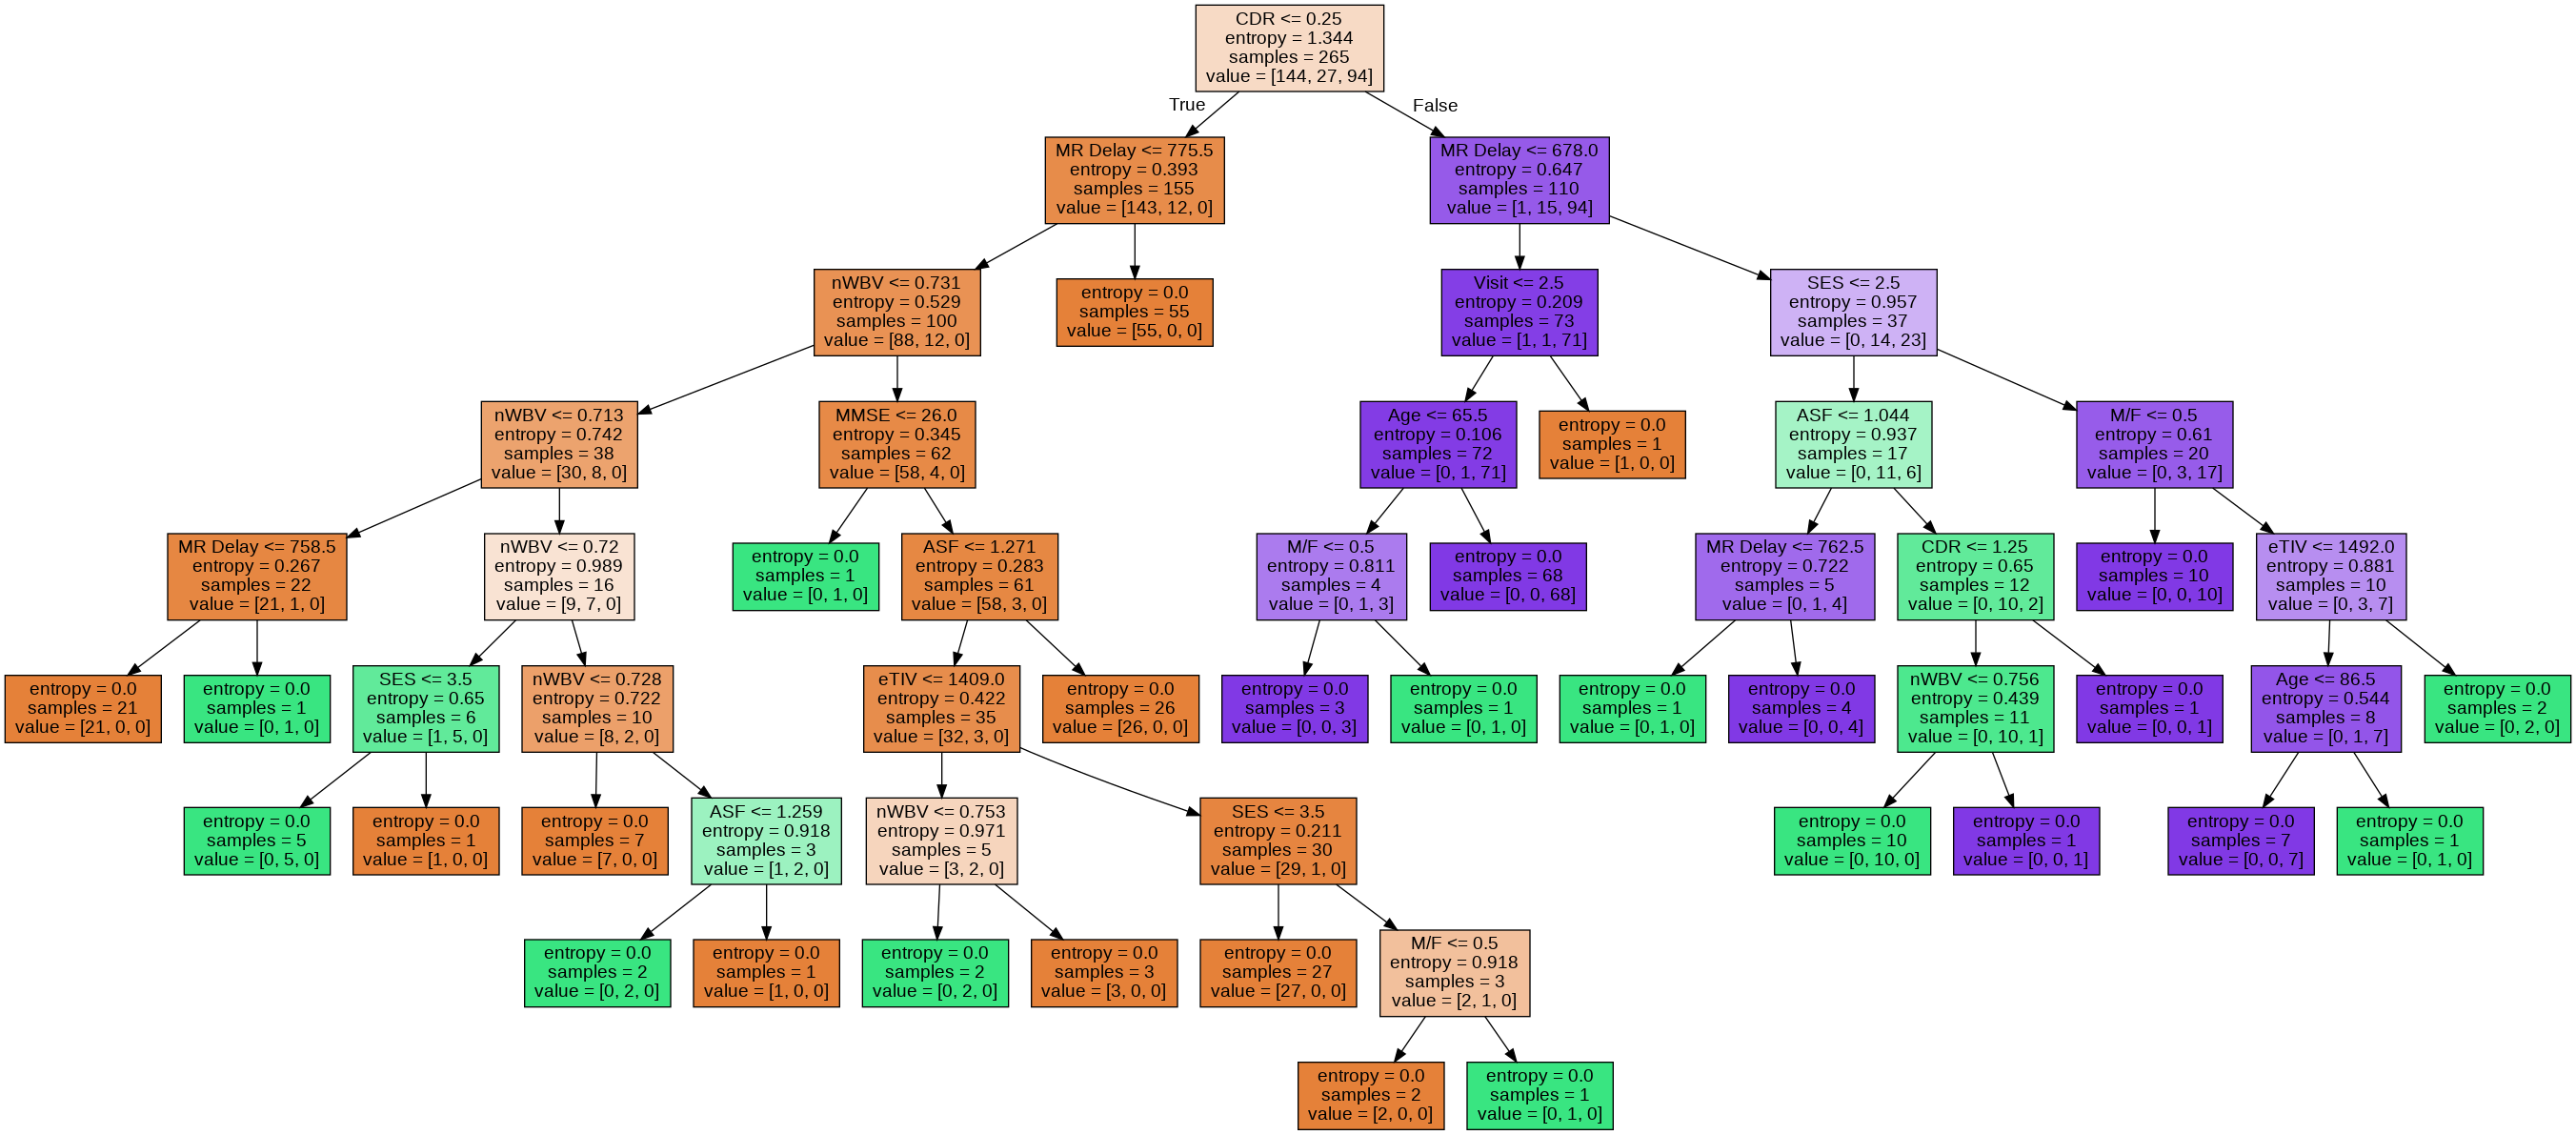

In [ ]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
import pydot
from IPython.display import Image

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data, feature_names=["Visit", "MR Delay", "M/F", "Hand", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"], class_names=None, filled=True)

graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Identificadas as features CDR e MR Delay como as duas mais importantes, mais no topo da árvore de decisão
# Carregando o dataset novamente para executar todos os algoritmos com essas duas features

In [ ]:
dementia = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/dementia_dataset.csv")

# Mantendo apenas as duas colunas de feature (CDR e MR Delay) e a coluna a ser predita (Group)

# Durante os testes iniciais foram identificados muitos problemas para executar o notebook todo. Só foi possível executar sob as seguintes condições:
# . mantendo o valor a ser predito (Group) como int64 e contendo apenas dois valores
# . utlizando apenas duas features (CDR e MR Delay), que precisavam ser int64 ou float64.

In [ ]:
dementia.drop(["Subject ID", "MRI ID", "Visit", "M/F", "Hand", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"], axis=1, inplace=True)
#dementia = dementia.dropna()
dementia['Group'] = dementia['Group'].replace(['Nondemented'],0)
dementia['Group'] = dementia['Group'].replace(['Converted'],1)
dementia['Group'] = dementia['Group'].replace(['Demented'],1)
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    int64  
 1   MR Delay  373 non-null    int64  
 2   CDR       373 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.9 KB


# Outro problema identificado foi a manipulação dos subconjutos X e y do dataset que não podiam ter o nome da columa

In [ ]:
X = dementia.iloc[:, [1, 2]].values
y = dementia.iloc[:, 0].values

#y = dementia["Group"].to_frame()
#X = dementia.drop(["Group"], axis=1)

# Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Feature Scaling -- is not necessary, just keep because of plot
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Logistic Regression**

# Como foi dito anteriormente, só foi possível utlizar o algoritmo de regressão logística com duas features

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Visual libraries
import plotly.graph_objs as go

# Visualising the Training set results

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
fig = go.Figure(data = 
    go.Contour(
        z=classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        x=X1[0].tolist(),
        y=[item[0] for item in X2],
        contours=dict(
            start=0,
            end=1,
            size=1,
        ),
        colorscale=[[0.0, "rgb(0,0,0)"],
                    [1.0, "rgb(46,139,87)"]],
        showscale=False
    ))

for i, j in enumerate(np.unique(y_set)):
    fig.add_trace(go.Scatter(x=X_set[y_set == j, 0], y=X_set[y_set == j, 1], name=str(j), 
                             marker_color=["rgb(191,191,191)", "rgb(0,128,0)"][j],
                             mode='markers'))

fig.update_layout(title='Logistic Regression Classification (Training set)', 
                  xaxis={"title": "MR Delay x CDR"},
                  yaxis={"title": "Estimated Group"})
fig.show()

# [Adriano e Thomas] - Considerando as features selecionadas, alguns valores foram preditos incorretamente, gerando falsos positivos (FP) e falsos negativos (FN)

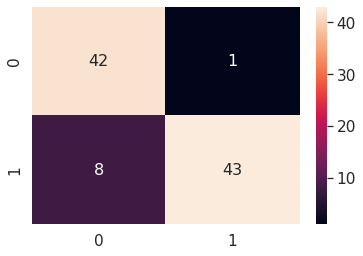

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Visual libraries
import seaborn as sns

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

# [Adriano e Thomas] - Se os valores de FP e FN fossem zero, o modelo estaria em overfitting. Não é o caso. Dos quatro algoritmos analisados, esse de regressão logística foi o que performou melhor, gerando uma área sob a curva de 0.94

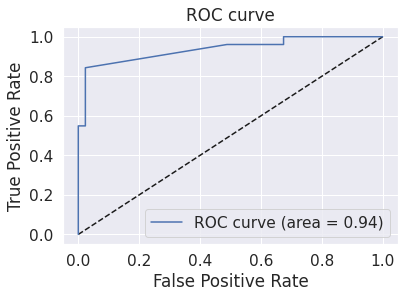

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = classifier.decision_function(X_test)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# **K-NN**

# [Adriano e Thomas] - Como foi dito anteriormente, só foi possível utlizar o algoritmo K-NN com duas features

In [ ]:
# Fitting K-NN to the Training set
# criterion: metric = 'minkowski', p = 2 imply euclidian distance
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Visualising the Training set results

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
fig = go.Figure(data = 
    go.Contour(
        z=classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        x=X1[0].tolist(),
        y=[item[0] for item in X2],
        contours=dict(
            start=0,
            end=1,
            size=1,
        ),
        colorscale=[[0.0, "rgb(0,0,0)"],
                    [1.0, "rgb(46,139,87)"]],
        showscale=False
    ))

for i, j in enumerate(np.unique(y_set)):
    fig.add_trace(go.Scatter(x=X_set[y_set == j, 0], y=X_set[y_set == j, 1], name=str(j), 
                             marker_color=["rgb(191,191,191)", "rgb(0,128,0)"][j],
                             mode='markers'))    

fig.update_layout(title='K-NN (Test set)', 
                  xaxis={"title": "MR Delay x CDR"},
                  yaxis={"title": "Estimated Group"})
fig.show()

# [Adriano e Thomas] - Considerando as features selecionadas, alguns valores foram preditos incorretamente, gerando falsos positivos (FP) e falsos negativos (FN)

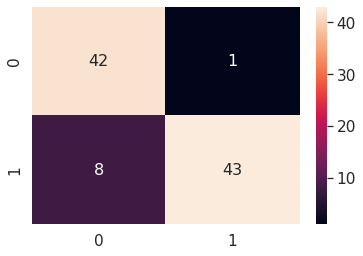

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
ns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

# [Adriano e Thomas] - Se os valores de FP e FN fossem zero, o modelo estaria em overfitting. Não é o caso. Dos quatro algoritmos analisados, esse de K-Nearest Neighbor foi o segundo a performar melhor, gerando uma área sob a curva de 0.93

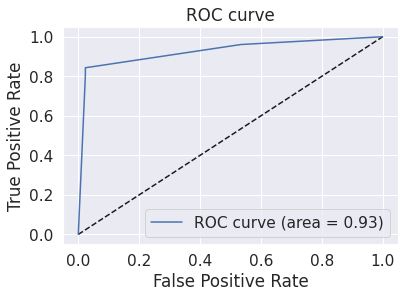

In [ ]:
y_score = classifier.predict_proba(X_test)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# **Decision Tree**

# [Adriano e Thomas] - Como foi dito anteriormente, só foi possível utlizar o algoritmo de árvore de decisão com duas features

In [ ]:
# Decision Tree Classification to the Training set
# criterion: quality of split. Reduce the entropy to gain information
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Visualising the Training set results

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
fig = go.Figure(data = 
    go.Contour(
        z=classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        x=X1[0].tolist(),
        y=[item[0] for item in X2],
        contours=dict(
            start=0,
            end=1,
            size=1,
        ),
        colorscale=[[0.0, "rgb(0,0,0)"],
                    [1.0, "rgb(46,139,87)"]],
        showscale=False
    ))

for i, j in enumerate(np.unique(y_set)):
    fig.add_trace(go.Scatter(x=X_set[y_set == j, 0], y=X_set[y_set == j, 1], name=str(j), 
                             marker_color=["rgb(191,191,191)", "rgb(0,128,0)"][j],
                             mode='markers'))    

fig.update_layout(title='Decision Tree Classification (Training set)', 
                  xaxis={"title": "MR Delay x CDR"},
                  yaxis={"title": "Estimated Group"})
fig.show()

# [Adriano e Thomas] - Considerando as features selecionadas, alguns valores foram preditos incorretamente, gerando falsos positivos (FP) e falsos negativos (FN)

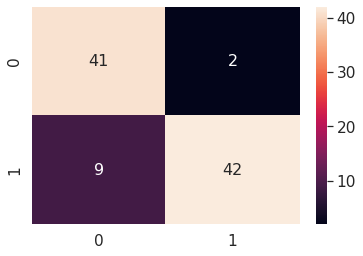

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

# [Adriano e Thomas] - Se os valores de FP e FN fossem zero, o modelo estaria em overfitting. Não é o caso. Dos quatro algoritmos analisados, esse de árvore de decisão foi o que performou pior, gerando uma área sob a curva de 0.90. De qualquer forma, não se caracteriza como underfitting, pois a área sob a curva está bem acima de 0.50

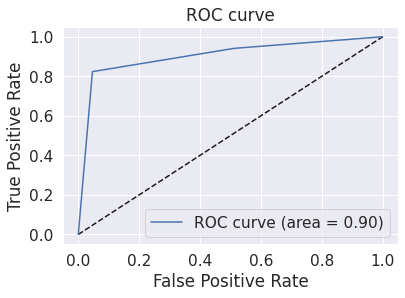

In [ ]:
y_score = classifier.predict_proba(X_test)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# [Adriano e Thomas] - A biblioteca sklearn.six foi deprecada. foi utilizada diretemente a six

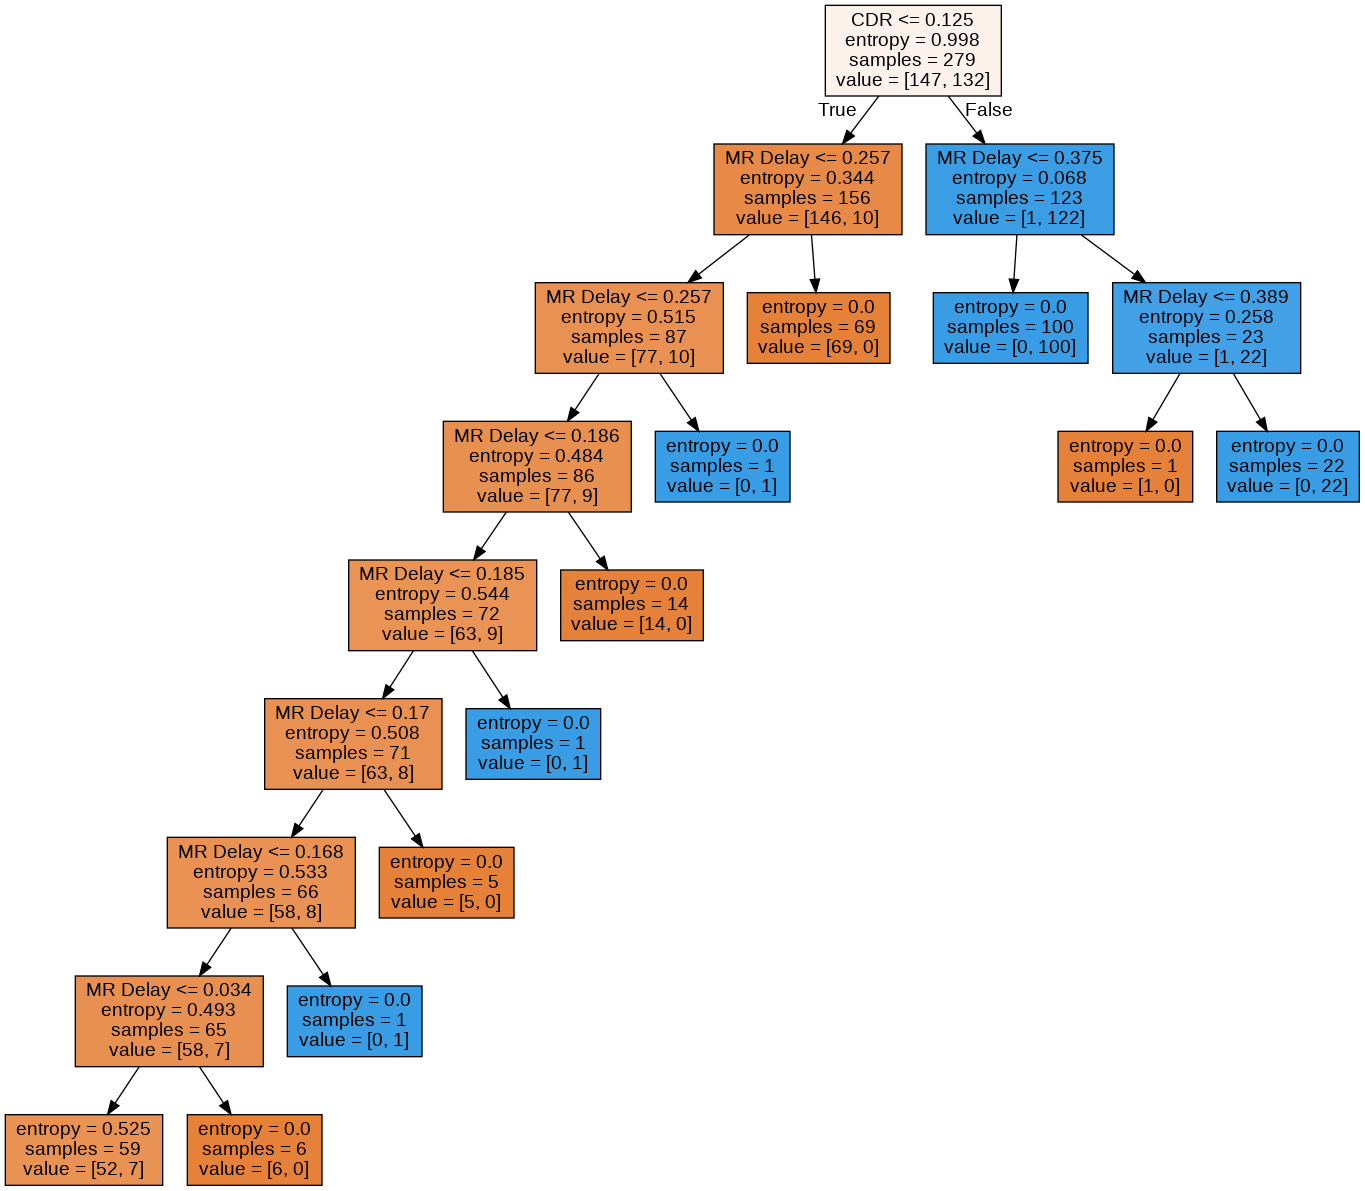

In [ ]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
import pydot
from IPython.display import Image

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data, feature_names=['MR Delay', 'CDR'], class_names=None, filled=True)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# **Random Forest**

# [Adriano e Thomas] - Como foi dito anteriormente, só foi possível utlizar o algoritmo de floresta aleatória com duas features

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
# Visualising the Training set results

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
fig = go.Figure(data = 
    go.Contour(
        z=classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        x=X1[0].tolist(),
        y=[item[0] for item in X2],
        contours=dict(
            start=0,
            end=1,
            size=1,
        ),
        colorscale=[[0.0, "rgb(0,0,0)"],
                    [1.0, "rgb(46,139,87)"]],
        showscale=False
    ))

for i, j in enumerate(np.unique(y_set)):
    fig.add_trace(go.Scatter(x=X_set[y_set == j, 0], y=X_set[y_set == j, 1], name=str(j), 
                             marker_color=["rgb(191,191,191)", "rgb(0,128,0)"][j],
                             mode='markers'))    

fig.update_layout(title='Random Forest Classification (Training set)', 
                  xaxis={"title": "MR Delay x CDR"},
                  yaxis={"title": "Estimated Group"})
fig.show()

# [Adriano e Thomas] - Considerando as features selecionadas, alguns valores foram preditos incorretamente, gerando falsos positivos (FP) e falsos negativos (FN)

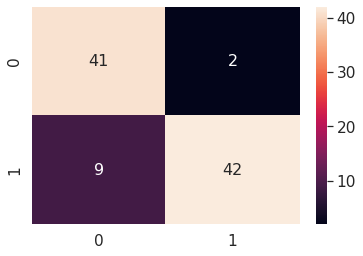

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

# [Adriano e Thomas] - Se os valores de FP e FN fossem zero, o modelo estaria em overfitting. Não é o caso. Dos quatro algoritmos analisados, esse de floresta aleatória foi o terceiro a parformar melhor ou segundo a performar pior, gerando uma área sob a curva de 0.93

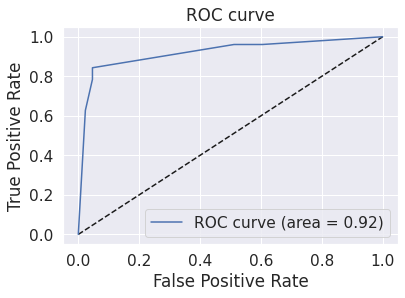

In [ ]:
y_score = classifier.predict_proba(X_test)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()